# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [96]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data = pd.read_csv ("../dataset/prices.csv",  sep=';')

# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

In [98]:
data.dropna()

,Size,Price
0,51.000000,901.18810
1,70.367350,972.23867
2,89.734690,1001.99394
3,109.102040,1024.90830
4,128.469390,1053.72491
...,...,...
57,1154.938771,1348.96848
58,1174.306117,1241.28857
59,1193.673464,1241.28857
60,1213.040810,1199.14125


In [189]:
data.head()

,Size,Price
0,51.00000,901.18810
1,70.36735,972.23867
2,89.73469,1001.99394
3,109.10204,1024.90830
4,128.46939,1053.72491


In [190]:
data.describe()

,Size,Price
count,62.000000,62.000000
mean,641.704081,1327.839685
std,349.418285,148.292994
min,51.000000,901.188100
25%,346.352037,1241.288570
50%,641.704085,1358.216850
75%,937.056123,1447.718920
max,1232.408156,1527.818240


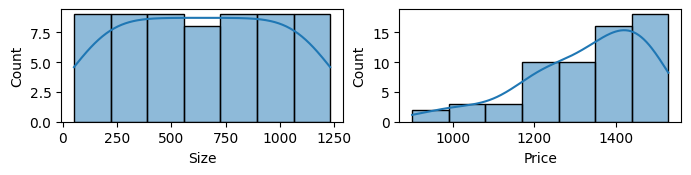

In [191]:
pos = 1
fig = plt.figure(figsize=(8, 12))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i],ax=ax, kde=True)

In [197]:
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [198]:
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [199]:
data_std.describe()

,Size,Price
count,6.200000e+01,6.200000e+01
mean,3.187414e-16,-2.467560e-15
std,1.000000e+00,1.000000e+00
min,-1.690536e+00,-2.877085e+00
25%,-8.452679e-01,-5.836494e-01
50%,1.186304e-08,2.048456e-01
75%,8.452678e-01,8.083945e-01
max,1.690536e+00,1.348537e+00


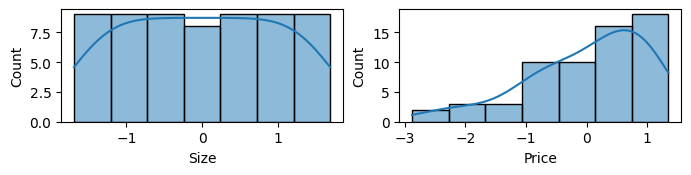

In [200]:
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

In [201]:
X = np.array(data['Size'])
Y = np.array(data['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [202]:
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [203]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [204]:
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: -1.2773421917836685
RMSE: 118.2392144264557


In [205]:
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.5623133122206994
RMSE: 106.05694045157402


# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

In [206]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [207]:
# Náhodné rozdělení dat na testovací a trénovací
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [208]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [209]:
# Modul lineární regrese potřebuje X ve formě matice, proto provedeme reshape
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [210]:
lin_model = LinearRegression()

In [211]:
lin_model.fit(X_train, Y_train)

LinearRegression()

In [212]:
# vypsání parametrů modelu
print ("Bias: ", lin_model.intercept_)
print("Váhy: ", lin_model.coef_)

Bias:  1118.066132556337
Váhy:  [0.35088417]


In [213]:
def print_model_score(Y_train, y_train_predict, label):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

In [214]:
Y_predicted = lin_model.predict(X_train)
Y_test_predicted = lin_model.predict(X_test)
print_model_score(Y_train, Y_predicted, "Train")

Train R2 score: 0.5713940344221127
Train RMSE: 97.15720919606046


In [215]:
def visualize_model_2d (X, Y, Y_predicted, title="Linear model", x_label="x", y_label="y"):  
    # spojeni X_train, Y_train a Y_predicted do jednoho numpy pole, aby šly setřídit
    prediction = np.zeros((X.shape[0], 3))
    prediction[:,0]=X[:,0]
    prediction[:,1]=Y
    prediction[:,2]=Y_predicted
    prediction=prediction[prediction[:, 0].argsort()]    
            
    fig1 = plt.figure() 
    plt.plot (prediction[:,0], prediction[:,2], c='b', label = "Train prediction")
    plt.scatter (prediction[:,0], prediction[:,1], marker = 'x', c='r', label="Train actual")
    plt.title (title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

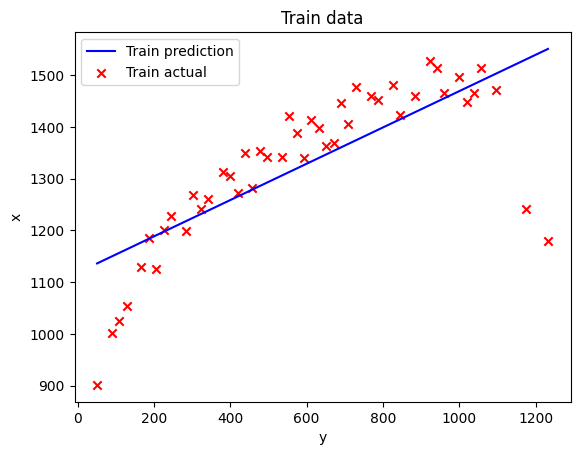

In [216]:

visualize_model_2d(X_train, Y_train, Y_predicted, "Train data")

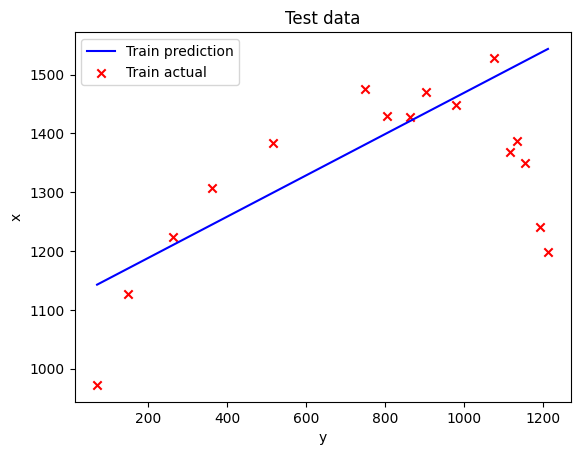

Test R2 score: -0.000647956134267158
Test RMSE: 143.1377301115407


In [217]:
visualize_model_2d(X_test, Y_test, Y_test_predicted, "Test data")
print_model_score(Y_test, Y_test_predicted, "Test")

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [219]:
def polynomial_fit(X, Y, degree = 1):
    return np.poly1d(np.polyfit(X, Y, degree))

In [220]:
def visualize_model (p, X_train, Y_train, X_test, Y_test, degree, x_label = "Size", y_label = "Price"):              
    fig1 = plt.figure()    
    plt.scatter (X_train, Y_train, c='r', label="Train ")
    plt.scatter (X_test, Y_test, c='b', label="Test ")
    
    curve_x = np.arange(min(X_train), max(max(X_train), max(X_test)), 0.01)    
    plt.plot(curve_x, p(curve_x), label=f"Polynomial of degree {degree}")  
            
    plt.title ("Model")
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

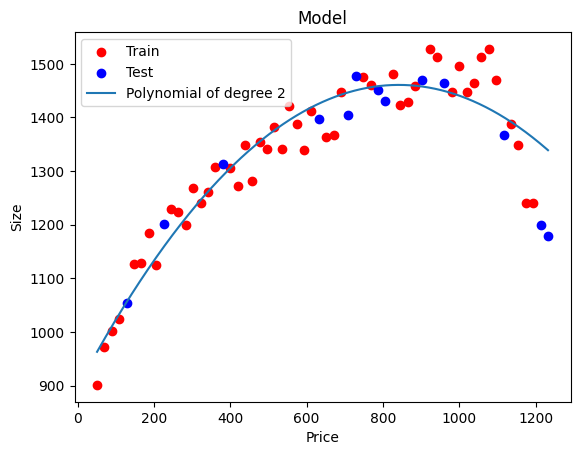

Váhy:  [-7.96603406e-04  1.34061815e+00  8.96663423e+02]
Train R2 score: -1.992143657198591
Train RMSE: 260.5337485860138
Test R2 score: -2.398581982326428
Test RMSE: 243.9970335109771


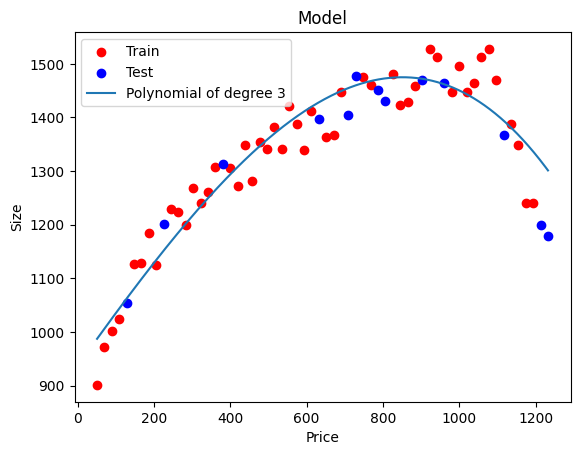

Váhy:  [-3.67000657e-07 -1.18454441e-04  9.99267819e-01  9.36591065e+02]
Train R2 score: -4.45882415430809
Train RMSE: 351.90247398131027
Test R2 score: -5.595116367802334
Test RMSE: 339.89666420576606


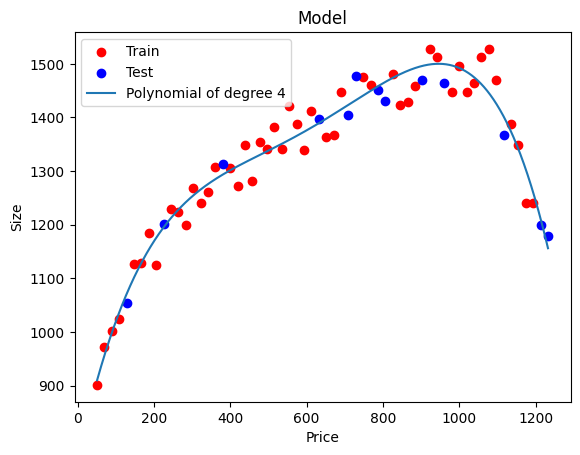

Váhy:  [-3.75357215e-09  8.99653639e-06 -7.76869010e-03  3.25509481e+00
  7.62837621e+02]
Train R2 score: -53.08006962478245
Train RMSE: 1107.6215295621887
Test R2 score: -66.75090270462326
Test RMSE: 1089.4146569815678


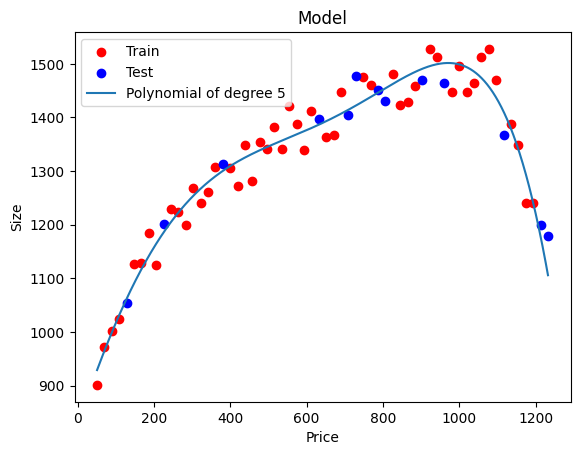

Váhy:  [-3.35218859e-12  6.65204695e-09 -2.63727377e-06 -2.13578823e-03
  2.14689205e+00  8.25259353e+02]
Train R2 score: -113.94410770799864
Train RMSE: 1614.790272014652
Test R2 score: -140.02427759190587
Test RMSE: 1571.7469012058891


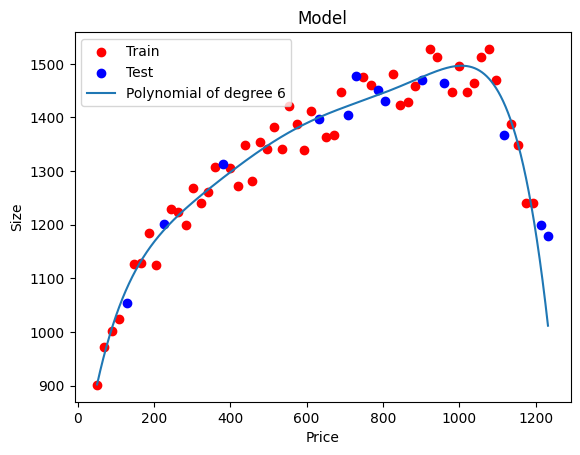

Váhy:  [-1.60495333e-14  5.66575293e-11 -7.93896610e-08  5.64800311e-05
 -2.19368351e-02  5.03965347e+00  6.95188940e+02]
Train R2 score: -509.80255745703914
Train RMSE: 3404.0764047078496
Test R2 score: -583.277771686123
Test RMSE: 3199.2291856067714


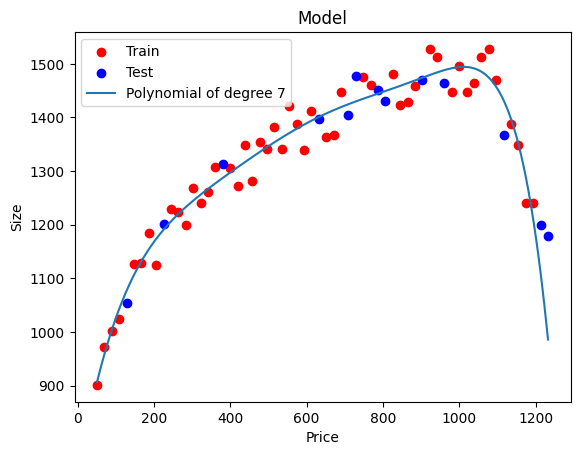

Váhy:  [-1.05510948e-17  2.97646243e-14 -2.28254698e-11 -9.12494080e-09
  2.30572861e-05 -1.36531172e-02  4.09617290e+00  7.30483611e+02]
Train R2 score: -817.6041318875571
Train RMSE: 4309.329813614964
Test R2 score: -905.297277124767
Test RMSE: 3984.474103511947


In [221]:
for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)    
    print("Váhy: ", p.coef)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")